In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

In [ ]:
iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target
#plt.figure(figsize=(12,6))
#sns.boxplot(x='sepal length (cm)', y='species', data=iris_pd, orient='h')
#sns.boxplot(x='petal length (cm)', y='species', data=iris_pd, orient='h')
#sns.boxplot(x='sepal width (cm)', y='species', data=iris_pd, orient='h')
#sns.boxplot(x='petal width (cm)', y='species', data=iris_pd, orient='h')
sns.pairplot(iris_pd, hue='species', palette='Accent');

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
iris_tree = DecisionTreeClassifier()
iris_tree.fit(iris.data[:,2:], iris.target)
y_pred_tr = iris_tree.predict(iris.data[:,2:])
accuracy_score(iris.target, y_pred_tr)

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [ ]:
plt.figure(figsize=(14,8))
plot_decision_regions(X=iris.data[:, 2:], y=iris.target, clf=iris_tree, legend=2)
plt.show()

In [156]:
# 테스트 모델 분리
iris = load_iris()
features = iris.data[:,2:]
labels = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=50)


In [157]:
# 학습 모델 결과
iris_tree = DecisionTreeClassifier(max_depth=3, random_state=50)
iris_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=50)

In [158]:
# 학습 모델 정확도
y_pred_tr = iris_tree.predict(X_train)
accuracy_score(Y_train, y_pred_tr)

0.9833333333333333

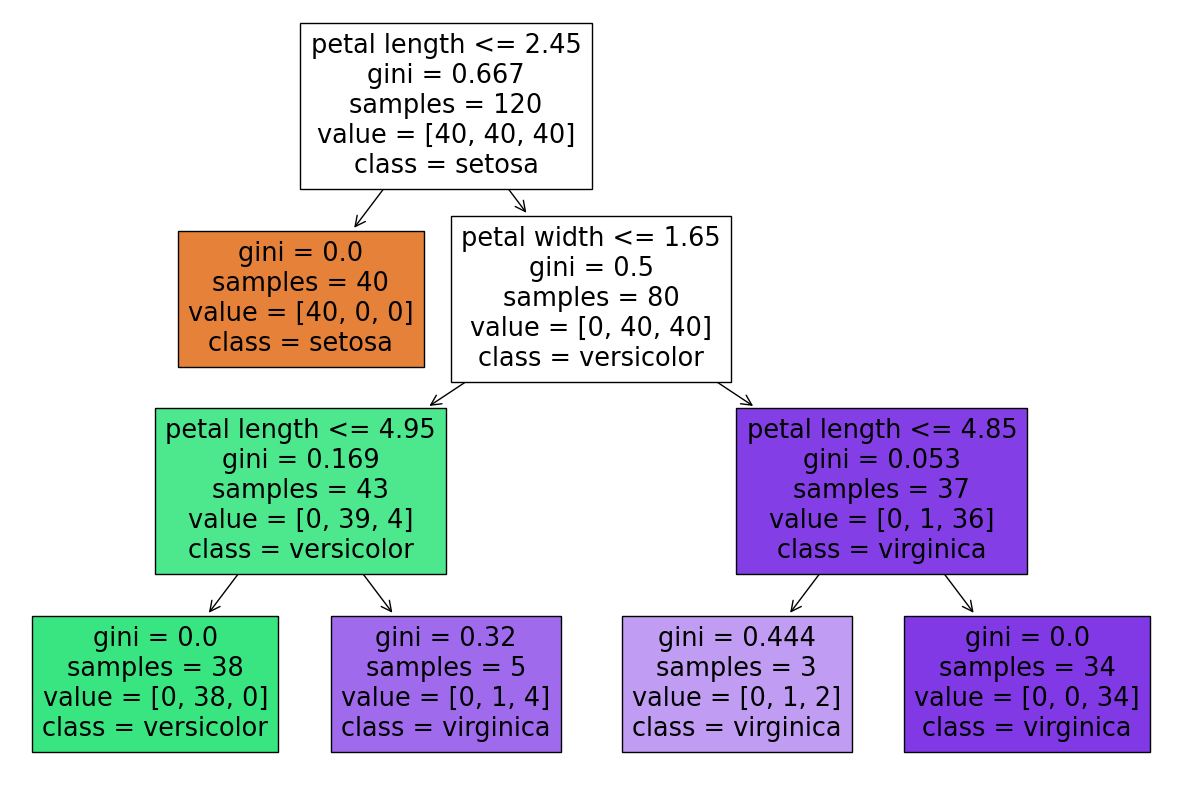

In [159]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(iris_tree, feature_names=['petal length', 'petal width'], class_names = list(iris.target_names), filled=True)

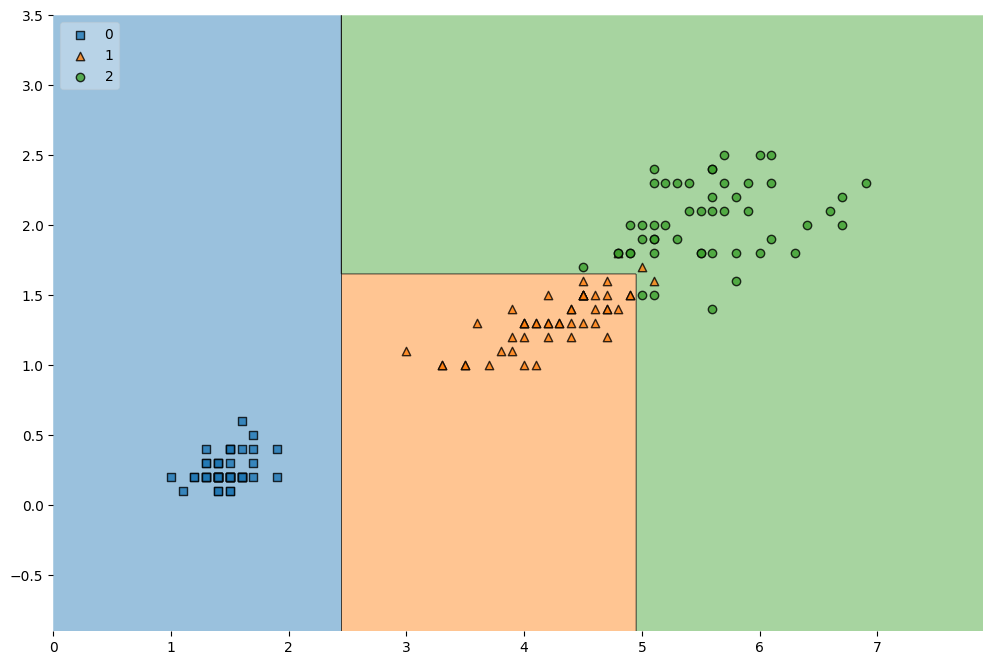

In [160]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12,8))
plot_decision_regions(X=features, y=labels, clf=iris_tree, legend=2)
plt.show()

In [161]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(Y_test, y_pred_test)

0.9666666666666667

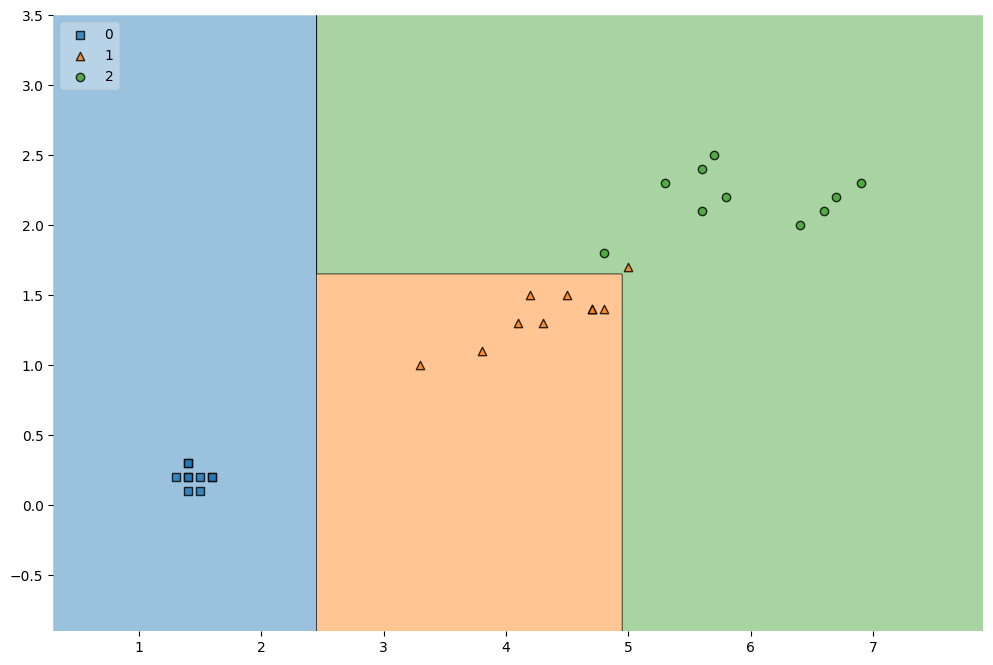

In [162]:
plt.figure(figsize=(12,8))
plot_decision_regions(X=X_test, y=Y_test, clf=iris_tree, legend=2)
plt.show()

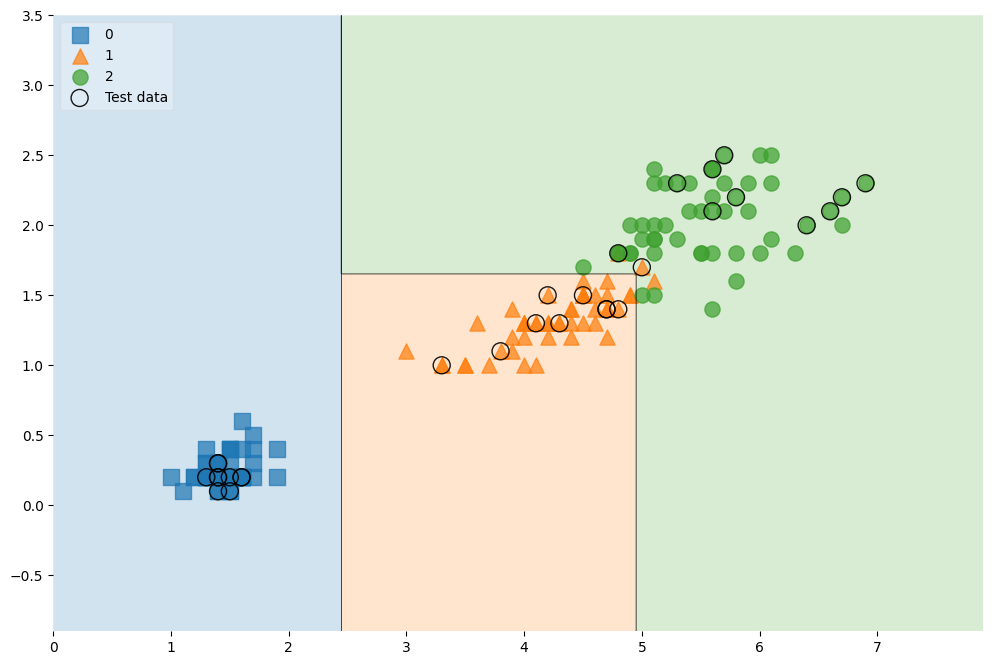

In [163]:
scatter_highlight_kwargs = {'s':150, 'label':'Test data', 'alpha':0.9}
scatter_kwargs = {'s':120, 'edgecolor':None, 'alpha':0.7}

plt.figure(figsize=(12,8))
plot_decision_regions(X=features, y=labels, X_highlight=X_test, clf=iris_tree, legend=2, scatter_highlight_kwargs=scatter_highlight_kwargs, scatter_kwargs=scatter_kwargs, contourf_kwargs={'alpha':0.2})
plt.show()

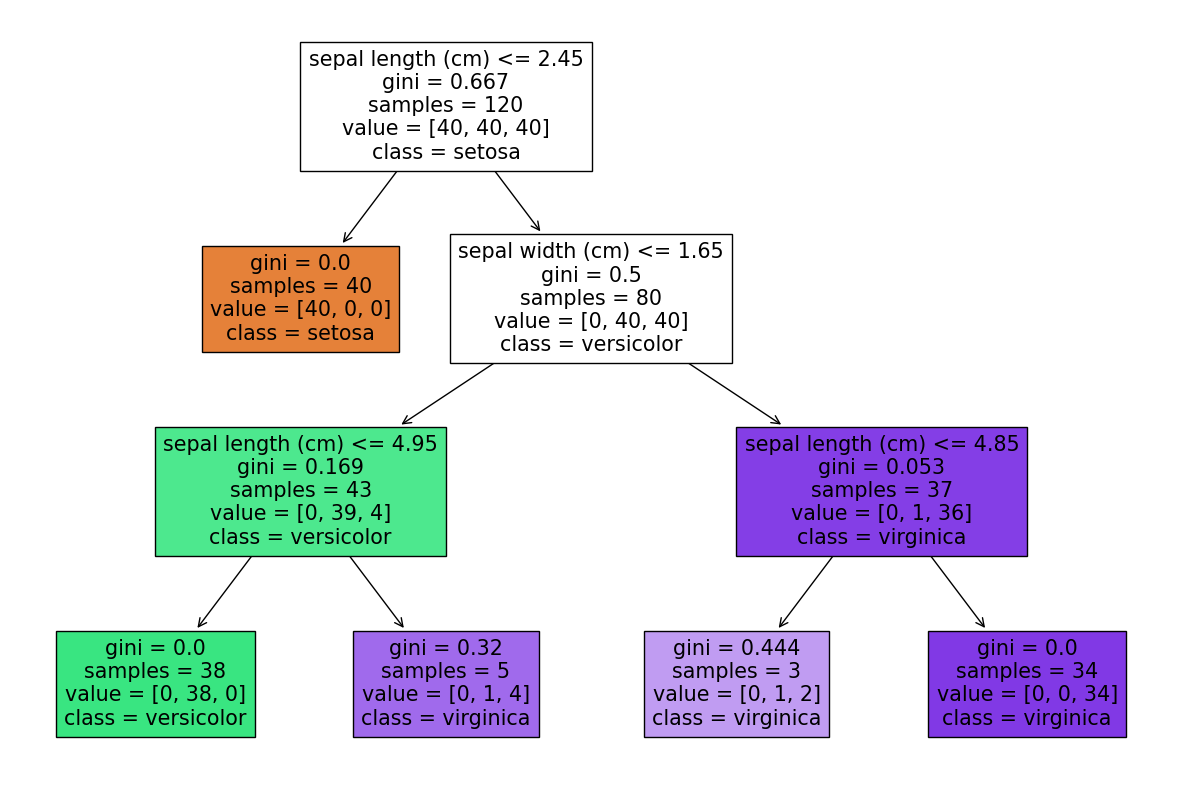

In [164]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(iris_tree, feature_names=list(iris.feature_names), class_names = list(iris.target_names), filled=True)

In [166]:
test_data = [[4.3, 2.0]]
iris.target_names[iris_tree.predict(test_data)]

array(['virginica'], dtype='<U10')